# <span style="color:#ff884d">Figures</span>

In [1]:
import pandas as pd
import numpy as np

from IPython.display import Image
from IPython.core.display import HTML

 <b>First, let's import a DataFrame to play with</b>

In [2]:
folder = 'C:/Users/liel-/Dropbox/PyCharm/PycharmProjectsNew/Python-classes//'
df = pd.read_excel(folder + 'example_data_FLU09.xlsx',
                   sheet_name='FLU09 plasma',
                   index_col='ID')

In [3]:
df.head()

,Age,Gender,Flu_positive,Strain,Systemic,log_VL,EGF,FKN,GRO,IFNγ,...,IL9,IL10,IP10,MCP1,MCP3,MDC,MIP1α,TGFα,TNFα,TNFβ
ID,,,,,,,,,,,,,,,,,,,,,
3200,15.075280,Female,False,Negative,116.0,NaN,5.24,20.86,98.41,9.97,...,3.04,2.53,539.44,199.33,9.66,775.28,3.01,1.39,15.25,2.09
3201,1.502778,Male,True,A (pH1),98.0,2.296168,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3202,3.744444,Male,True,A (H3),100.0,3.076230,179.16,49.11,1019.90,8.36,...,2.26,31.87,3560.13,2737.32,67.07,1158.00,171.51,3.61,15.93,1.61
3203,13.052778,Female,False,Negative,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3204,6.633333,Female,False,Negative,NaN,NaN,191.72,33.36,2038.28,7.36,...,0.33,0.09,225.61,159.52,6.66,1867.52,8.43,2.36,4.91,0.53


 ## Basic plotting with matplotlib.pyplot 

In [4]:
import matplotlib.pyplot as plt

### <span style="color: #8600b3">Bar plot</span>

In [5]:
strain_counts = df['Strain'].value_counts()
print(strain_counts)

Negative                               142
A (pH1)                                 69
A (H3)                                  62
B                                       27
A                                        6
B / A                                    1
possible B and A (day 7) coinfected      1
Name: Strain, dtype: int64


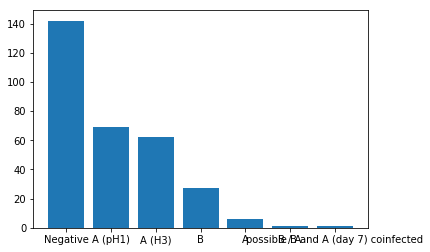

In [6]:
plt.bar(strain_counts.index, # x: The x labels of the bars
        strain_counts)       # height: The height(s) of the bars (y)

plt.show()

 That doesn't look good.. Lets redo it

In [7]:
strain_counts.drop(['B / A', 'possible B and A (day 7) coinfected'], inplace=True)

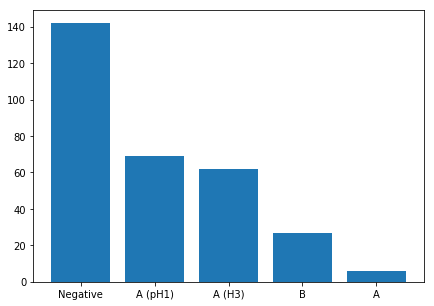

In [8]:
plt.figure(figsize=(7,5))
plt.bar(strain_counts.index, strain_counts)
plt.show()

Now.. How can we add a title? Axis labels? Change colors?

Lets first understand how a matplotlib figure is constructed.
https://matplotlib.org/faq/usage_faq.html

In [9]:
Image(url= "https://files.realpython.com/media/fig_map.bc8c7cabd823.png")

In [10]:
Image(url='https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png', width=500, height=250)

 Lets change our figure's properties 

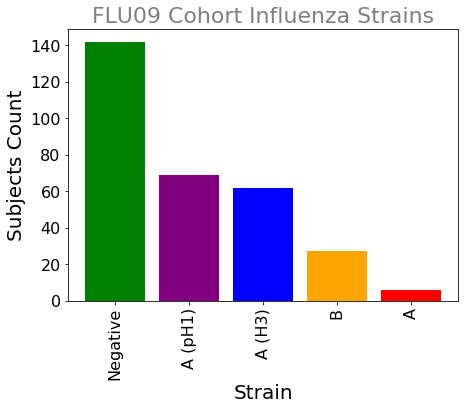

In [11]:
plt.figure(figsize=(7,5))
plt.bar(strain_counts.index, strain_counts, color=['Green', 'Purple', 'Blue', 'Orange', 'Red'])

plt.title('FLU09 Cohort Influenza Strains', fontsize=22, color='Grey')
plt.xlabel('Strain', fontsize=20)
plt.ylabel('Subjects Count', fontsize=20)
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

### <span style="color: #8600b3">Histogram plot</span>

In [12]:
df['Age'].head(10)

ID
3200    15.075280
3201     1.502778
3202     3.744444
3203    13.052778
3204     6.633333
3205     1.158333
3206    19.052778
3207    12.566667
3208     6.079930
3209    19.222222
Name: Age, dtype: float64

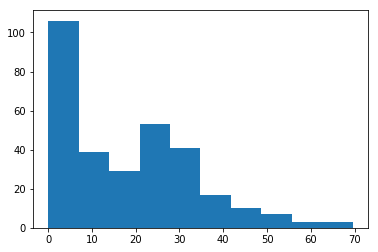

In [13]:
plt.hist(df['Age'])
plt.show()

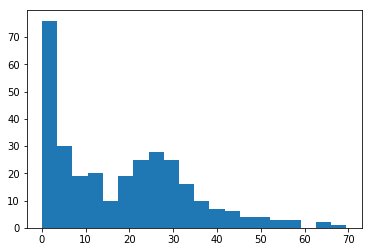

In [14]:
plt.hist(df['Age'], bins=20)
plt.show()

<b>Histogram plot - stacked by groups</b><br>
(we can do a similar thing with bars plot!) 

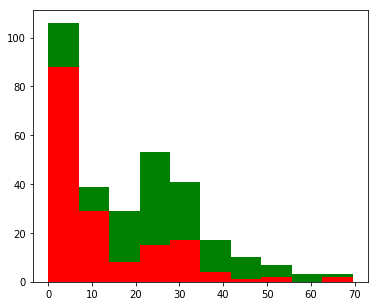

In [15]:
plt.figure(figsize=(6, 5))
plt.hist([df.loc[df['Flu_positive']==True, 'Age'],
          df.loc[df['Flu_positive']==False, 'Age']], # multiple lists
         color=['red', 'green'], stacked=True)
plt.show()

 Manually create legend 

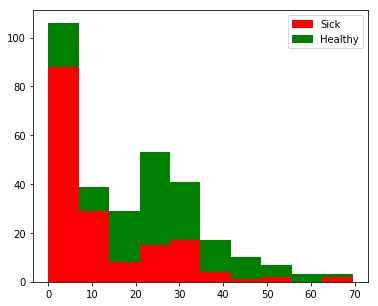

In [16]:
plt.figure(figsize=(6, 5))
plt.hist([df.loc[df['Flu_positive']==True, 'Age'],
          df.loc[df['Flu_positive']==False, 'Age']], # multiple lists
         color=['red', 'green'], stacked=True)

from matplotlib.patches import Patch

sick_patch = Patch(label='Sick', color='red')
healthy_patch = Patch(label='Healthy', color='green')
plt.legend(handles=[sick_patch, healthy_patch])

plt.show()

Not stacked.. Problem here is that X axis is distorted that way (since it's continuous and not categorical)<br>
So it'd be better to manually construct a bar plot with a bar for each range

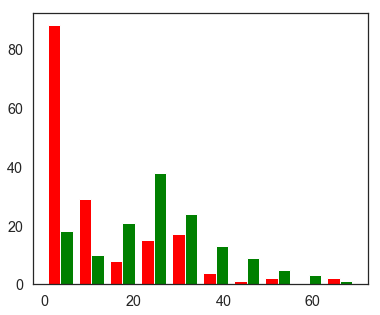

In [53]:
plt.figure(figsize=(6, 5))
plt.hist([df.loc[df['Flu_positive']==True, 'Age'],
          df.loc[df['Flu_positive']==False, 'Age']], # multiple lists
         color=['red', 'green'], stacked=False)
plt.show()

### <span style="color: #8600b3">Scatter plot</span>

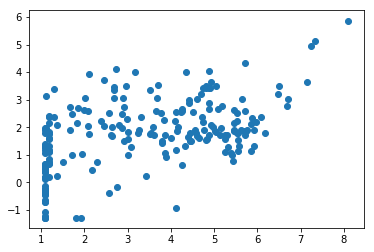

In [17]:
plt.scatter(np.log(df['EGF']), np.log(df['TNFα'])) #x, y (list / series)
plt.show()
# of course, laberls should be added as shown previously

### <span style="color: #8600b3">Line plot</span>

In [18]:
# First let's create a small df
df_VL = pd.DataFrame({'Viral Load': [22, 22, 18, 14, 12, 12],
                      'Cytokine': [18, 25, 22, 17, 13, 12],
                      'Day': [1, 2, 3, 4, 5, 6]})
print(df_VL)

   Viral Load  Cytokine  Day
0          22        18    1
1          22        25    2
2          18        22    3
3          14        17    4
4          12        13    5
5          12        12    6


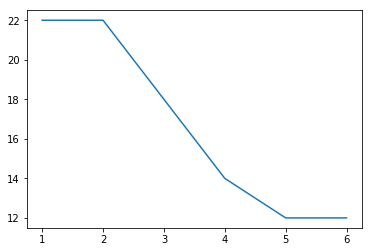

In [19]:
plt.plot(df_VL['Day'], # x axis 
         df_VL['Viral Load']) # y axis
plt.show()

<b>We can add plots on top of each other!</b><br>
(gotta make sure it makes sense - same x) 

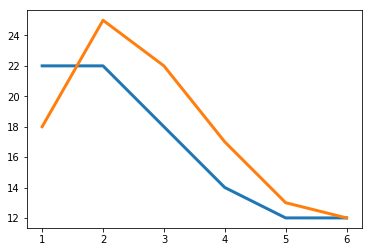

In [20]:
plt.plot(df_VL['Day'], df_VL['Viral Load'], linewidth=3)
plt.plot(df_VL['Day'], df_VL['Cytokine'], linewidth=3)
plt.show()

 Let's also add a legend and x axis label

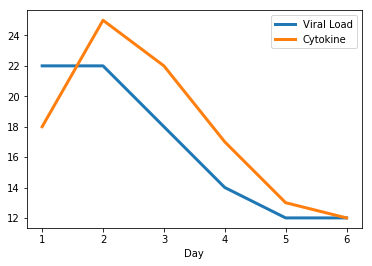

In [21]:
plt.plot(df_VL['Day'], df_VL['Viral Load'], linewidth=3)
plt.plot(df_VL['Day'], df_VL['Cytokine'], linewidth=3)
plt.legend() # Uses the series names
plt.xlabel('Day')
plt.show()

 ## Plotting with seaborn

In [22]:
import seaborn as sns

### <span style="color: #8600b3">Scatter plot, seaborn style </span>

In [23]:
# With Seaborn, we can use lists/series for x and y, or, supply the entire df
df[["log_GRO", "log_EGF"]] = np.log(df[["GRO", "EGF"]])

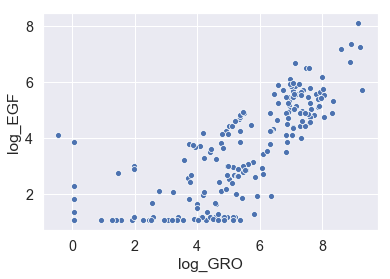

In [24]:
sns.set_style("dark")
sns.set(font_scale = 1.3)
sns.scatterplot(data=df, x="log_GRO", y="log_EGF")
plt.show()

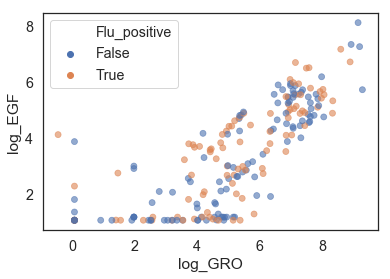

In [25]:
sns.set_style("white")
sns.scatterplot(data=df, x="log_GRO", y="log_EGF", hue="Flu_positive", alpha=0.6, edgecolor=None)
plt.show()

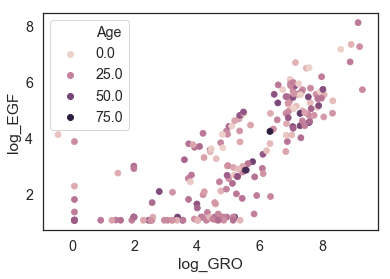

In [26]:
sns.scatterplot(data=df, x="log_GRO", y="log_EGF", hue="Age", edgecolor=None)
plt.show()

### <span style="color: #8600b3">Boxplots</span>

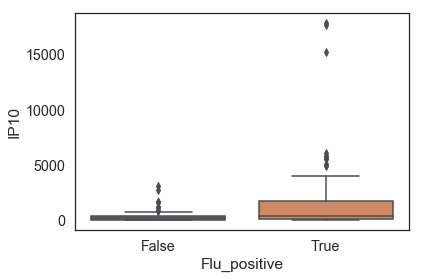

In [27]:
sns.boxplot(data=df, y='IP10', x='Flu_positive')
plt.show()

<b>No outliers</b>

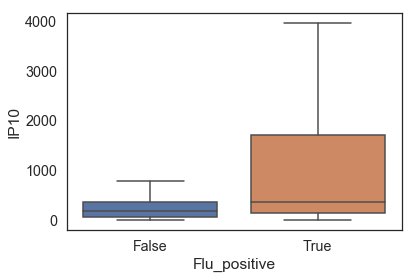

In [28]:
sns.boxplot(data=df, y='IP10', x='Flu_positive', showfliers=False)
plt.show()

C:\Users\liel-\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\liel-\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


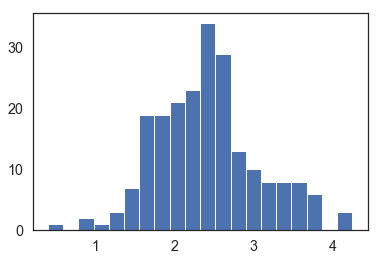

In [29]:
plt.hist(np.log10(df['IP10']), bins=20)
plt.show()

<b>Change to log scale</b>

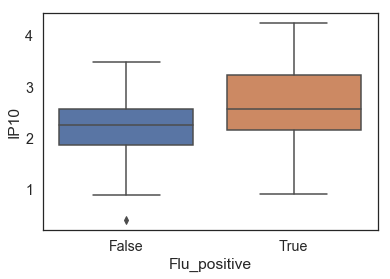

In [30]:
sns.boxplot(y=np.log10(df['IP10']), x=df['Flu_positive'])
plt.show()

<b>Add "hue" - split boxes with another categorical variable</b>

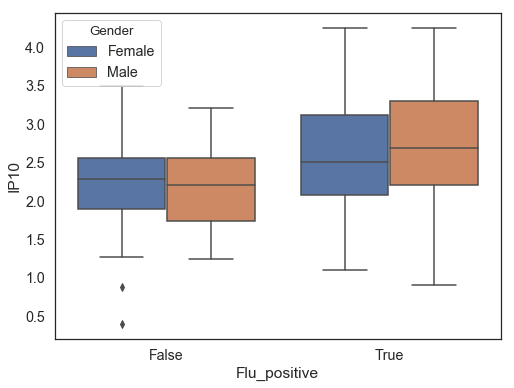

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(y=np.log10(df['IP10']), x=df['Flu_positive'], hue=df['Gender'])
plt.show()

<b>Add datapoints</b>

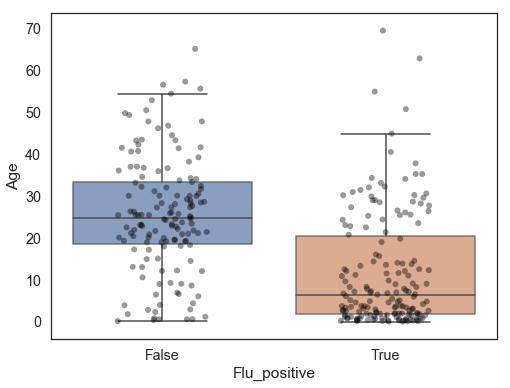

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='Age', x='Flu_positive',
            showfliers=False, boxprops=dict(alpha=0.7))
sns.stripplot(data=df, y='Age', x='Flu_positive',
              jitter=0.2, size=6, alpha=0.4, color='black') # manipulate markers
plt.show()

# plt.tight_layout()
# plt.savefig(folder + 'boxplot_age_flu.jpg', dpi=300)

### <span style="color: #8600b3">Heatmaps</span>

Get columns relevant for a correlation matrix - numeric (are booleans considered numeric?)

In [33]:
print(df.dtypes)

Age             float64
Gender           object
Flu_positive       bool
Strain           object
Systemic        float64
log_VL          float64
EGF             float64
FKN             float64
GRO             float64
IFNγ            float64
IL1α            float64
IL2             float64
IL4             float64
IL5             float64
IL6             float64
IL8             float64
IL9             float64
IL10            float64
IP10            float64
MCP1            float64
MCP3            float64
MDC             float64
MIP1α           float64
TGFα            float64
TNFα            float64
TNFβ            float64
log_GRO         float64
log_EGF         float64
dtype: object


In [34]:
correl_cols = []
for col, col_type in df.dtypes.iteritems():
    if col_type is np.dtype('float64') and col[0:3] != 'log':
        correl_cols.append(col)

print(correl_cols)

['Age', 'Systemic', 'EGF', 'FKN', 'GRO', 'IFNγ', 'IL1α', 'IL2', 'IL4', 'IL5', 'IL6', 'IL8', 'IL9', 'IL10', 'IP10', 'MCP1', 'MCP3', 'MDC', 'MIP1α', 'TGFα', 'TNFα', 'TNFβ']


<b>Compute spearman correlation matrix</b>

In [35]:
correl_matrix = df[correl_cols].corr(method='spearman')
correl_matrix.head()

,Age,Systemic,EGF,FKN,GRO,IFNγ,IL1α,IL2,IL4,IL5,...,IL9,IL10,IP10,MCP1,MCP3,MDC,MIP1α,TGFα,TNFα,TNFβ
Age,1.000000,-0.045225,-0.173713,-0.199650,-0.116818,-0.133526,-0.247155,-0.091672,0.000039,0.005384,...,-0.149844,-0.300618,-0.144149,0.008801,-0.254252,-0.052873,-0.142763,-0.012516,-0.163172,-0.132873
Systemic,-0.045225,1.000000,0.280540,0.269406,0.282205,0.195911,0.193637,-0.014663,-0.153032,0.023580,...,-0.025894,0.317898,0.381395,0.268257,0.201151,0.141577,0.207535,0.202658,0.250090,0.006176
EGF,-0.173713,0.280540,1.000000,0.620252,0.840942,0.492281,0.289657,0.105147,0.219236,-0.067357,...,0.085628,0.220951,0.641557,0.438359,0.564362,0.505449,0.590715,0.613569,0.487755,0.029541
FKN,-0.199650,0.269406,0.620252,1.000000,0.533172,0.492448,0.484157,0.465619,0.203444,0.268579,...,0.156688,0.461294,0.448507,0.186083,0.743137,0.171055,0.519989,0.590568,0.686643,0.203344
GRO,-0.116818,0.282205,0.840942,0.533172,1.000000,0.338122,0.177202,0.033038,0.157294,-0.181927,...,-0.073312,0.126615,0.697368,0.471486,0.468782,0.549350,0.510597,0.533808,0.412564,-0.114105


<b>Plot heatmap</b>

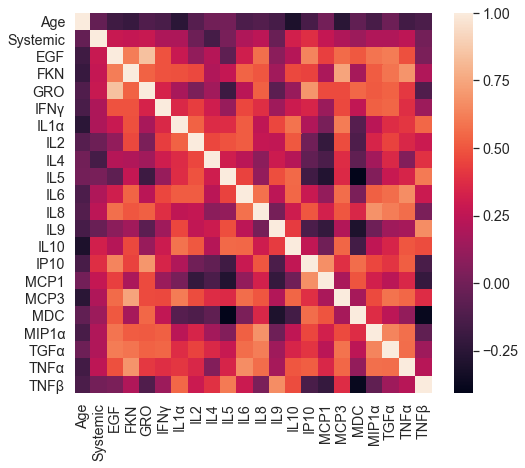

In [36]:
plt.figure(figsize=(8,7))
sns.heatmap(correl_matrix)
plt.show()

Make the heatmap value limits and colors appropriate for correlations

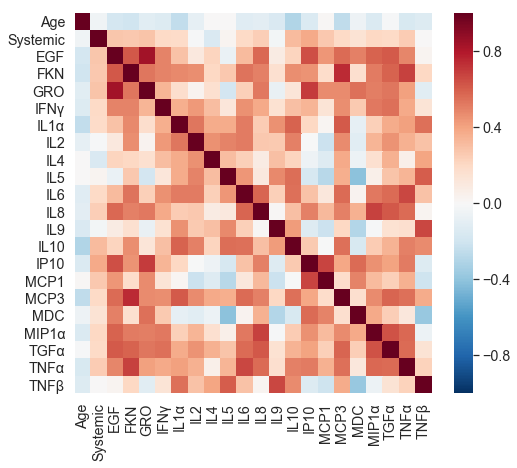

In [37]:
plt.figure(figsize=(8,7))
sns.heatmap(correl_matrix, vmin=-1, vmax=1, cmap='RdBu_r')
plt.show()

### Colormaps

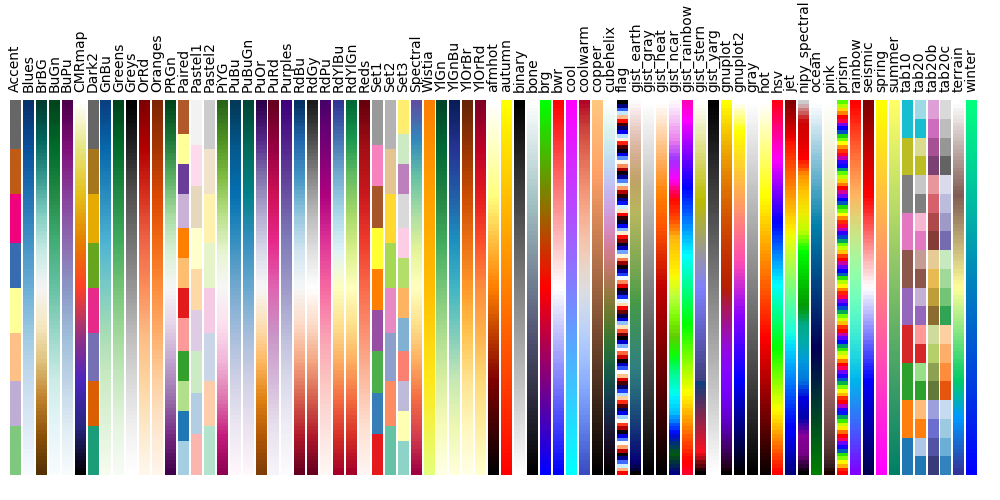

In [38]:
# http://scipy-lectures.org/intro/matplotlib/auto_examples/options/plot_colormaps.html
Image('http://scipy-lectures.org/_images/sphx_glr_plot_colormaps_001.png')

Add clustering!
### <span style="color: #8600b3">Clustermaps</span>

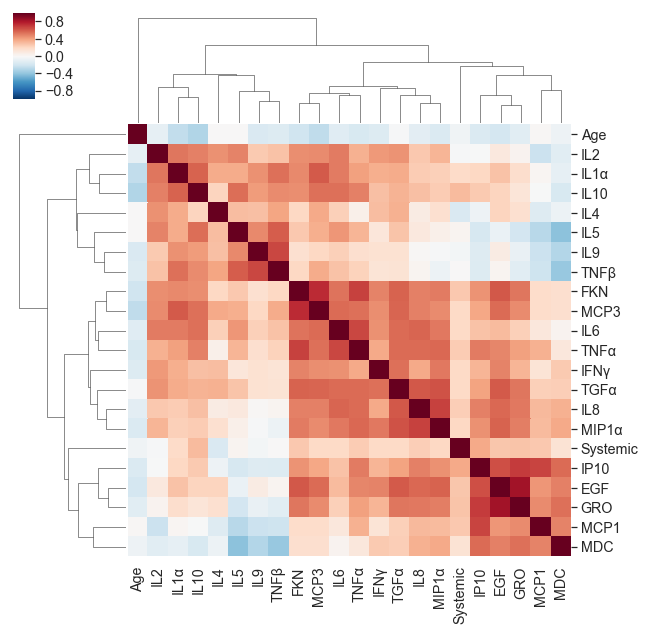

In [39]:
sns.clustermap(correl_matrix, vmin=-1, vmax=1, cmap='RdBu_r')
plt.show()

Let's add a title

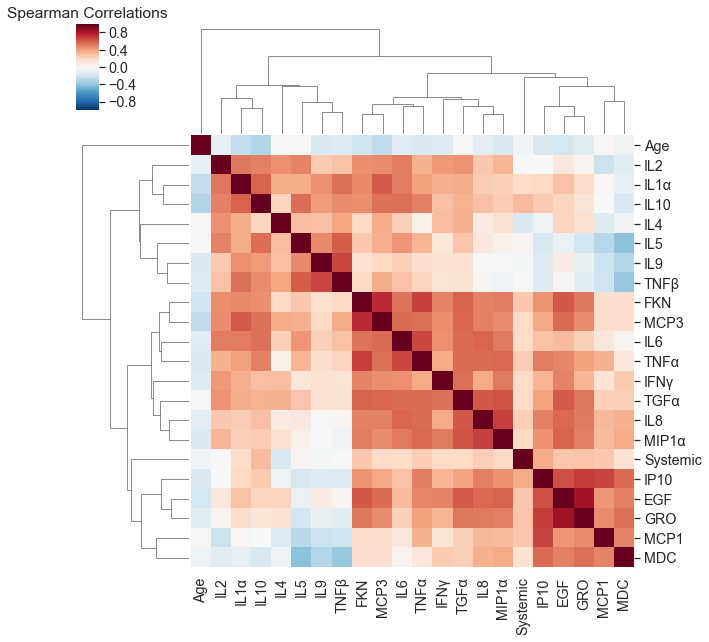

In [40]:
sns.clustermap(correl_matrix, vmin=-1, vmax=1, cmap='RdBu_r')
plt.title('Spearman Correlations')
plt.show()
# What happened?!

Reminder:<br>
@ The Figure is the final image that may contain 1 or more Axes.<br>
@ The Axes represent an individual plot (*don't confuse this with "axis" which refers to the x/y axis of a plot).

When we called plt.title, the title was plotted on the last axes created, which is the colormap!
If we'd like to add a title to the entire clustermap, we need to access the correct axes / fig.
<br><br>
<b>Important commands:</b><br>
gca = plt.gca() # get current axes <br>
fig = plt.gcf() # get current fig <br>
all_axes = plt.gcf().get_axes() # get all current fig's axes list

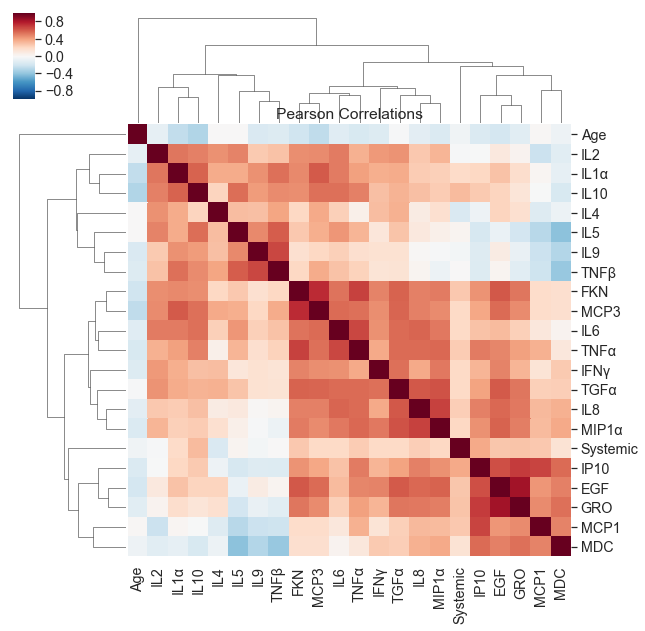

In [41]:
grid = sns.clustermap(correl_matrix, vmin=-1, vmax=1, cmap='RdBu_r') 
# The ClusterGrid object holds all axes in this figure
grid.ax_heatmap.set_title('Pearson Correlations')
plt.show()

Oh no... The title overlaps with the dendrogram.<br>
Let's add the title to the figure object itself

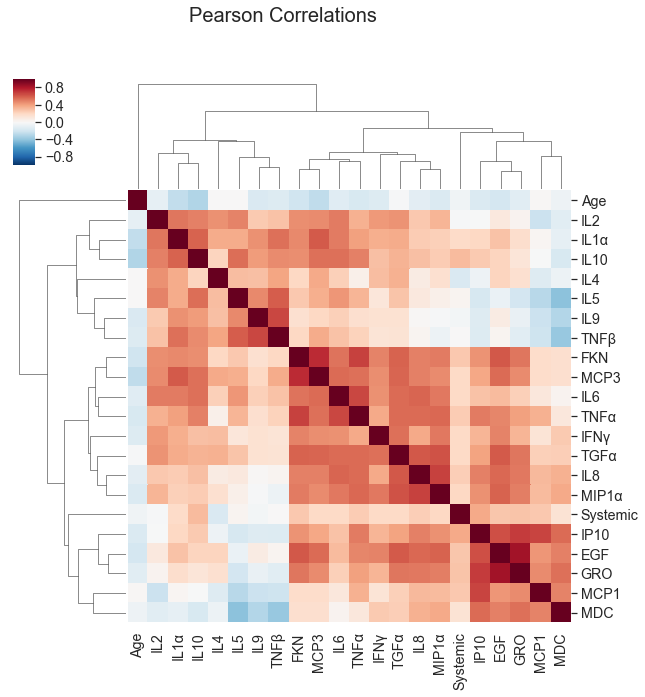

In [42]:
grid = sns.clustermap(correl_matrix, vmin=-1, vmax=1, cmap='RdBu_r')
grid.fig.suptitle('Pearson Correlations', size=20)
plt.show()

What if we want to manipulate a heatmap? It's different than a clustermap, since it has 1 axes

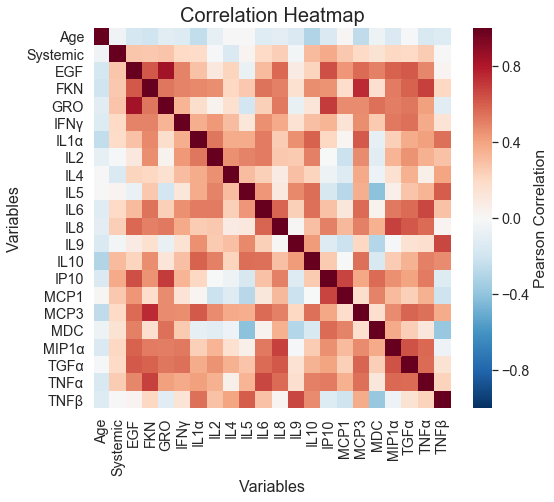

In [43]:
plt.figure(figsize=(8,7))
sns.heatmap(correl_matrix, vmin=-1, vmax=1, cmap='RdBu_r',
            cbar_kws={'label': 'Pearson Correlation'})
plt.title('Correlation Heatmap', size=20)
plt.xlabel('Variables', size=16)
plt.ylabel('Variables', size=16)
plt.show()

Or, we can do it using the axes object:

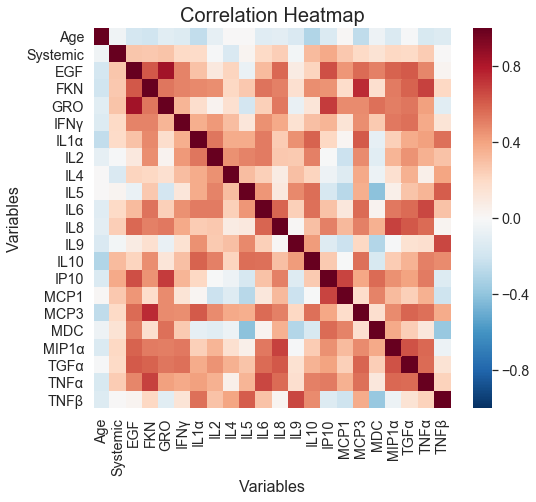

In [44]:
plt.figure(figsize=(8,7))
ax = sns.heatmap(correl_matrix, vmin=-1, vmax=1, cmap='RdBu_r')
ax.set_title('Correlation Heatmap', size=20)
ax.set_xlabel('Variables', size=16)
ax.set_ylabel('Variables', size=16)
plt.show()

There are multiple ways to do things! Use google<br>

<b>Recommended reading:</b><br>
@ Life cycle of a plot: https://matplotlib.org/3.1.0/tutorials/introductory/lifecycle.html <br>
@ Using subplots demo: https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html <br>
@ Adding axes to a figure options: https://stackoverflow.com/questions/43326680/what-are-the-differences-between-add-axes-and-add-subplot

### <span style="color: #8600b3">Histogram</span>

In [45]:
df_iris = sns.load_dataset('iris')
df_iris.head(8)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa


C:\Users\liel-\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


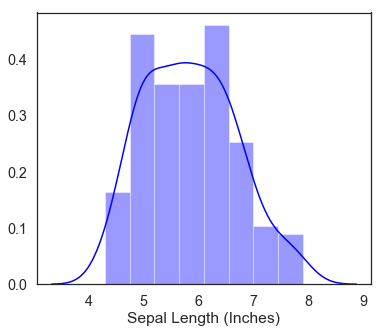

In [46]:
plt.figure(figsize=(6,5))
sns.distplot(df_iris["sepal_length"], color="blue", axlabel='Sepal Length (Inches)')
plt.show()

<b>Lets plot two histograms together</b>

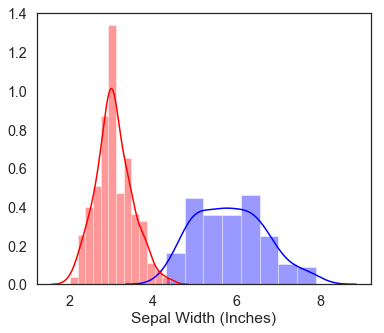

In [47]:
plt.figure(figsize=(6,5))
sns.distplot(df_iris["sepal_length"],
             color="blue", axlabel="Sepal Length (Inches)")
sns.distplot(df_iris["sepal_width"] ,
             color="red", axlabel="Sepal Width (Inches)")
plt.show()

Add legend, labels

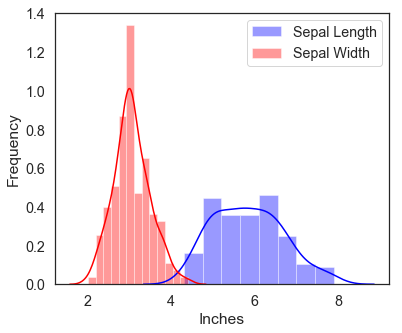

In [48]:
plt.figure(figsize=(6,5))
sns.distplot(df_iris["sepal_length"],
             color="blue", label="Sepal Length")
sns.distplot(df_iris["sepal_width"] ,
             color="red", label="Sepal Width")
ax = plt.gca() # get current axes
ax.set_xlabel('Inches')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

### <span style="color: #8600b3">Pairplot</span>

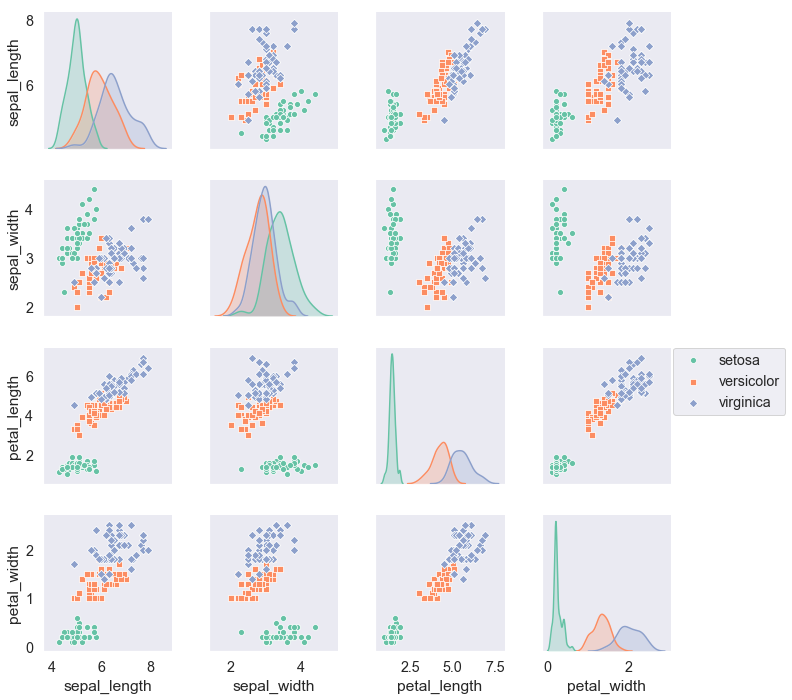

In [49]:
sns.set_style("dark")
g = sns.pairplot(df_iris, kind="scatter", hue="species", markers=["o", "s", "D"], palette="Set2")
g._legend._visible = False
plt.legend(bbox_to_anchor=(1.015, 1), borderaxespad=0)
plt.show()

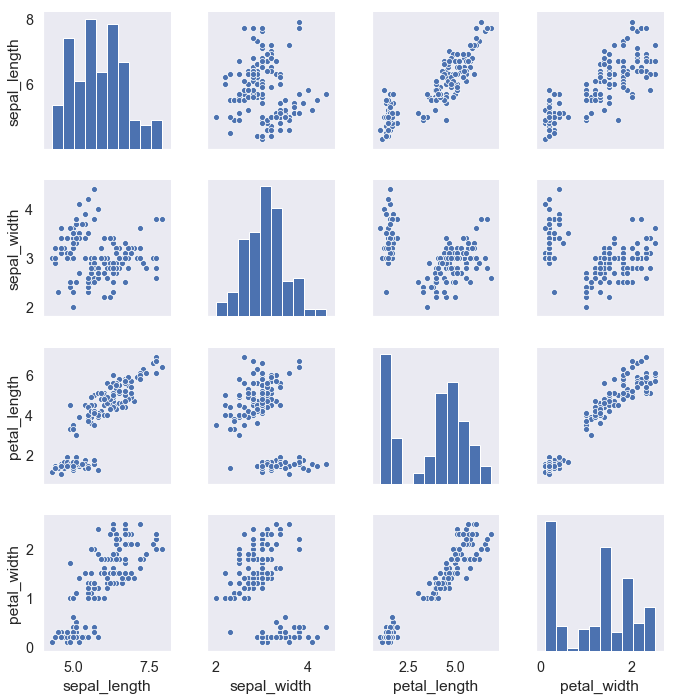

In [50]:
sns.set_style("dark")
g = sns.pairplot(df_iris, kind="scatter")
# g._legend._visible = False
# plt.legend(bbox_to_anchor=(1.015, 1), borderaxespad=0)
plt.show()

### <span style="color: #8600b3">Scatter + regression line</span>

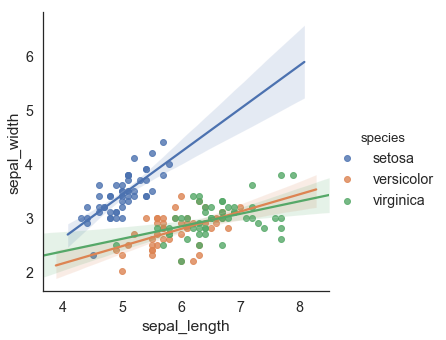

In [51]:
sns.set_style("white")
sns.lmplot(x='sepal_length', y='sepal_width', hue='species', data=df_iris)
plt.show()

What if we want to change the figure size? 
plt.figure(figsize=(8,5)) - will not work here! Since it's a FacetGrid object

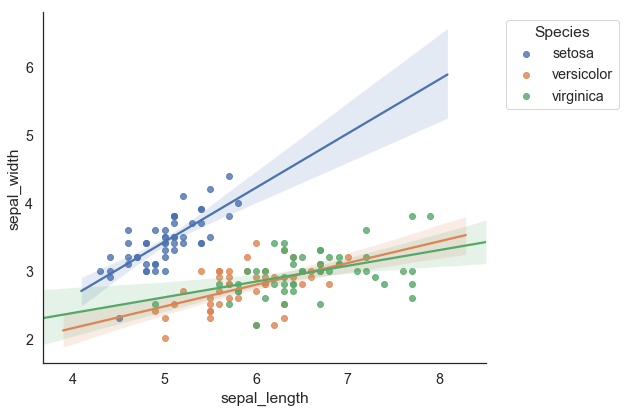

In [52]:
sns.lmplot(x='sepal_length', y='sepal_width', hue='species',
           data=df_iris, legend_out=False, height=6, aspect=1.2)
plt.legend(title='Species', bbox_to_anchor=(1.03, 1), loc=2, frameon=True)
plt.show()

Legend guide: https://matplotlib.org/users/legend_guide.html <br>
Legend documentation: https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend

Anything is possible!!!<br>
Graph galleries:<br>
https://python-graph-gallery.com/all-charts/ <br>
https://seaborn.pydata.org/examples/index.html <br>

Multiple plots using seaborn: https://seaborn.pydata.org/tutorial/axis_grids.html <br>

Matplotlib OOP objects + multiple axes (subplots) <br>
https://medium.com/@kapil.mathur1987/matplotlib-an-introduction-to-its-object-oriented-interface-a318b1530aed <br>
https://realpython.com/python-matplotlib-guide/ <br>

Seaborn: <br>
https://seaborn.pydata.org/introduction.html <br>
https://stackoverflow.com/questions/23969619/plotting-with-seaborn-using-the-matplotlib-object-oriented-interface <br>

Color picker: https://www.w3schools.com/colors/colors_picker.asp